### House Price Prediction

In [1]:
import pandas as pd
import torch
import torch.nn as nn

#### Importing the Boston Housing Database

In [2]:
df = pd.read_csv("BostonHousing.csv")
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
x = df.drop('medv', axis=1)
y = df['medv']

In [4]:
x = x.values
y = y.values

Scaling the database to to equaily fit every features 

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Feature Scaling (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)  # Scaling features

In [6]:
X_scaled = torch.tensor(X_scaled, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).view(-1, 1)  

Splitting the database for training and testing the models

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [8]:
type(x), type(y), type(X_scaled),type(y_train)

(numpy.ndarray, torch.Tensor, torch.Tensor, torch.Tensor)

#### Visualize the dataset

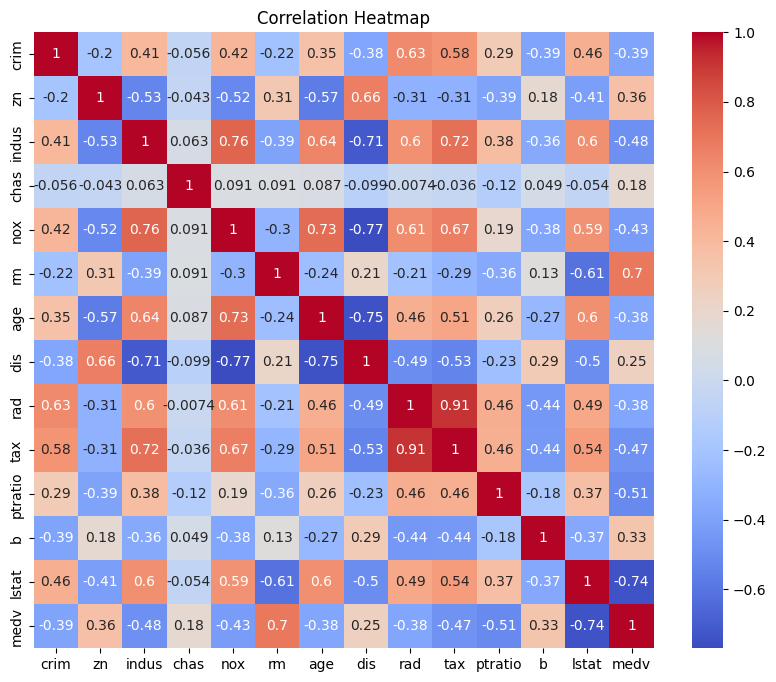

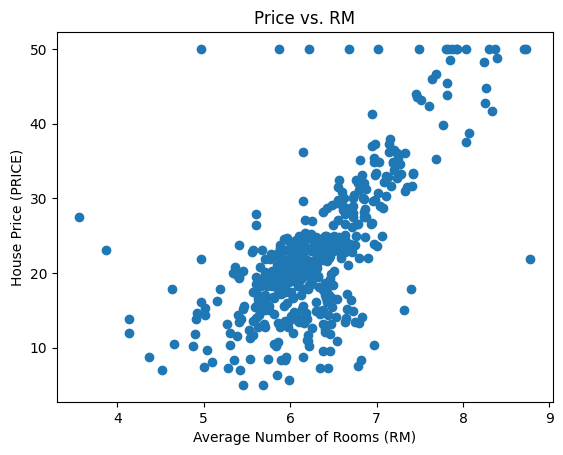

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Scatter plot of RM (average number of rooms per dwelling) vs PRICE
plt.scatter(df['rm'], df['medv'])
plt.xlabel('Average Number of Rooms (RM)')
plt.ylabel('House Price (PRICE)')
plt.title('Price vs. RM')
plt.show()

#### Building a Linear Regression Model

In [10]:
import torch.nn as nn

# Define a simple Linear Regression model
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)  # 1 output, since we are predicting house price
        
    def forward(self, x):
        return self.linear(x)

# Initialize the model
input_dim = X_train.shape[1]
model = LinearRegressionModel(input_dim)

# Loss function (Mean Squared Error)
criterion = nn.MSELoss()

# Optimizer (Stochastic Gradient Descent)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

#### Building a neural network

In [11]:
class NeuralNet(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, 1)  # 1 output (price prediction)
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Initialize the model
model_nn = NeuralNet(input_dim=input_dim, hidden_dim=64)  # e.g., 64 hidden units
optimizer_nn = torch.optim.Adam(model_nn.parameters(), lr=0.001)

#### Training the Linear model

In [12]:
# Train the Linear Regression Model
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    
    # Forward pass: Compute prediction
    y_pred_train = model(X_train)
    
    # Compute loss
    loss = criterion(y_pred_train, y_train)
    
    # Backward pass: Compute gradient and update the weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Print loss every 100 epochs
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 32.7530
Epoch [200/1000], Loss: 22.8459
Epoch [300/1000], Loss: 22.2498
Epoch [400/1000], Loss: 22.0214
Epoch [500/1000], Loss: 21.8936
Epoch [600/1000], Loss: 21.8165
Epoch [700/1000], Loss: 21.7674
Epoch [800/1000], Loss: 21.7345
Epoch [900/1000], Loss: 21.7114
Epoch [1000/1000], Loss: 21.6948


#### Training the neural network model

In [13]:
# Train the Neural Network Model
num_epochs = 1000
for epoch in range(num_epochs):
    model_nn.train()
    
    # Forward pass: Compute prediction
    y_pred_train = model_nn(X_train)
    
    # Compute loss
    loss = criterion(y_pred_train, y_train)
    
    # Backward pass: Compute gradient and update the weights
    optimizer_nn.zero_grad()
    loss.backward()
    optimizer_nn.step()
    
    # Print loss every 100 epochs
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], NN Loss: {loss.item():.4f}')

Epoch [100/1000], NN Loss: 443.3190
Epoch [200/1000], NN Loss: 178.1217
Epoch [300/1000], NN Loss: 62.9361
Epoch [400/1000], NN Loss: 32.0168
Epoch [500/1000], NN Loss: 25.1235
Epoch [600/1000], NN Loss: 21.7128
Epoch [700/1000], NN Loss: 19.0435
Epoch [800/1000], NN Loss: 16.9099
Epoch [900/1000], NN Loss: 15.1591
Epoch [1000/1000], NN Loss: 13.7565


#### Testing the Linear Model

In [14]:
model.eval()  # Set to evaluation mode
with torch.no_grad():  # No need to track gradients
    y_pred_test = model(X_test)
    test_loss = criterion(y_pred_test, y_test)
    for i in range(len(y_pred_test)):
        print(f"y_eval: {y_pred_test[i].item()}, y_test: {y_test[i]}, diff: {y_pred_test[i].item() - y_test[i]}.")
    rmse = torch.sqrt(test_loss)
    print(f'Linear Regression Test RMSE: {rmse.item():.4f}')

y_eval: 28.981828689575195, y_test: tensor([23.6000]), diff: tensor([5.3818]).
y_eval: 35.81794357299805, y_test: tensor([32.4000]), diff: tensor([3.4179]).
y_eval: 15.860027313232422, y_test: tensor([13.6000]), diff: tensor([2.2600]).
y_eval: 25.01252555847168, y_test: tensor([22.8000]), diff: tensor([2.2125]).
y_eval: 18.712387084960938, y_test: tensor([16.1000]), diff: tensor([2.6124]).
y_eval: 23.420278549194336, y_test: tensor([20.]), diff: tensor([3.4203]).
y_eval: 17.68941879272461, y_test: tensor([17.8000]), diff: tensor([-0.1106]).
y_eval: 14.563850402832031, y_test: tensor([14.]), diff: tensor([0.5639]).
y_eval: 22.816255569458008, y_test: tensor([19.6000]), diff: tensor([3.2163]).
y_eval: 20.828176498413086, y_test: tensor([16.8000]), diff: tensor([4.0282]).
y_eval: 24.678783416748047, y_test: tensor([21.5000]), diff: tensor([3.1788]).
y_eval: 18.680824279785156, y_test: tensor([18.9000]), diff: tensor([-0.2192]).
y_eval: -6.03864860534668, y_test: tensor([7.]), diff: tensor

#### Testing the neural network model

In [15]:
# Evaluation on test data (Neural Network)
model_nn.eval()
with torch.no_grad():
    y_pred_test_nn = model_nn(X_test)
    test_loss_nn = criterion(y_pred_test_nn, y_test)
    for i in range(len(y_pred_test_nn)):
        print(f"y_eval: {y_pred_test_nn[i].item()}, y_test: {y_test[i]}, diff: {y_pred_test_nn[i].item() - y_test[i]}.")
    rmse_nn = torch.sqrt(test_loss_nn)
    print(f'Neural Network Test RMSE: {rmse_nn.item():.4f}')

y_eval: 27.681074142456055, y_test: tensor([23.6000]), diff: tensor([4.0811]).
y_eval: 32.64784622192383, y_test: tensor([32.4000]), diff: tensor([0.2478]).
y_eval: 21.04698371887207, y_test: tensor([13.6000]), diff: tensor([7.4470]).
y_eval: 26.2319278717041, y_test: tensor([22.8000]), diff: tensor([3.4319]).
y_eval: 17.17655372619629, y_test: tensor([16.1000]), diff: tensor([1.0766]).
y_eval: 20.07040023803711, y_test: tensor([20.]), diff: tensor([0.0704]).
y_eval: 15.682156562805176, y_test: tensor([17.8000]), diff: tensor([-2.1178]).
y_eval: 14.026809692382812, y_test: tensor([14.]), diff: tensor([0.0268]).
y_eval: 21.195480346679688, y_test: tensor([19.6000]), diff: tensor([1.5955]).
y_eval: 15.854959487915039, y_test: tensor([16.8000]), diff: tensor([-0.9450]).
y_eval: 20.802587509155273, y_test: tensor([21.5000]), diff: tensor([-0.6974]).
y_eval: 15.998437881469727, y_test: tensor([18.9000]), diff: tensor([-2.9016]).
y_eval: 7.166581630706787, y_test: tensor([7.]), diff: tensor(

In [16]:
# Extract the learned coefficients (Linear Regression)
coefficients = model.linear.weight.detach().numpy().flatten()
features = df.columns[:-1]  # All feature names

# Create a DataFrame to display feature importance
importance_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
importance_df = importance_df.sort_values(by='Coefficient', ascending=False)

print(importance_df)

    Feature  Coefficient
5        rm     3.175400
8       rad     1.689333
11        b     1.126031
3      chas     0.733479
1        zn     0.578575
2     indus     0.087508
6       age    -0.192732
0      crim    -0.919545
9       tax    -1.155595
4       nox    -1.896891
10  ptratio    -1.952400
7       dis    -2.946251
12    lstat    -3.604395


#### Ridge regression model

Building the Ridge Regression model

In [17]:
def ridge_loss(output, target, modl, alpha):
    mse_loss = nn.MSELoss()(output, target)
    l2_reg = torch.tensor(0.)
    for param in modl.parameters():
        l2_reg += torch.norm(param)
    return l2_reg + mse_loss + alpha

model_ridge = LinearRegressionModel(input_dim)
optimizer_ridge = torch.optim.SGD(model_ridge.parameters(), lr=0.01)

Training the ridge model

In [18]:
num_epochs = 1000
for epoch in range(num_epochs):
    model_ridge.train()
    y_pred_train = model_ridge(X_train)
    
    loss_ridge = ridge_loss(y_pred_train, y_train, model_ridge, 0.1)
    
    optimizer_ridge.zero_grad()
    loss_ridge.backward()
    optimizer_ridge.step()
    
    if (epoch) % 99 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss_ridge.item():.10f}')

Epoch [1/1000], Loss: 607.9332885742
Epoch [100/1000], Loss: 60.1649131775
Epoch [199/1000], Loss: 50.8795547485
Epoch [298/1000], Loss: 50.5219383240
Epoch [397/1000], Loss: 50.4486465454
Epoch [496/1000], Loss: 50.4205818176
Epoch [595/1000], Loss: 50.4086456299
Epoch [694/1000], Loss: 50.4032669067
Epoch [793/1000], Loss: 50.4007263184
Epoch [892/1000], Loss: 50.3994598389
Epoch [991/1000], Loss: 50.3988113403


Testing the model

In [19]:
model_ridge.eval()
with torch.no_grad():
    y_pred_test_ridge = model_ridge(X_test)
    test_loss_ridge = criterion(y_pred_test_ridge, y_test)
    for i in range(len(y_pred_test_ridge)):
        print(f"y_eval: {y_pred_test_ridge[i].item()}, y_test: {y_test[i]}, diff: {y_pred_test_ridge[i].item() - y_test[i]}.")
    rmse_ridge = torch.sqrt(test_loss_ridge)
    print(f'Neural Network Test RMSE: {rmse_ridge.item():.4f}')

y_eval: 27.874065399169922, y_test: tensor([23.6000]), diff: tensor([4.2741]).
y_eval: 34.362091064453125, y_test: tensor([32.4000]), diff: tensor([1.9621]).
y_eval: 15.970442771911621, y_test: tensor([13.6000]), diff: tensor([2.3704]).
y_eval: 24.245988845825195, y_test: tensor([22.8000]), diff: tensor([1.4460]).
y_eval: 18.158649444580078, y_test: tensor([16.1000]), diff: tensor([2.0586]).
y_eval: 22.697921752929688, y_test: tensor([20.]), diff: tensor([2.6979]).
y_eval: 17.71678924560547, y_test: tensor([17.8000]), diff: tensor([-0.0832]).
y_eval: 14.536598205566406, y_test: tensor([14.]), diff: tensor([0.5366]).
y_eval: 21.3436279296875, y_test: tensor([19.6000]), diff: tensor([1.7436]).
y_eval: 20.456806182861328, y_test: tensor([16.8000]), diff: tensor([3.6568]).
y_eval: 23.976722717285156, y_test: tensor([21.5000]), diff: tensor([2.4767]).
y_eval: 19.14301300048828, y_test: tensor([18.9000]), diff: tensor([0.2430]).
y_eval: -5.147609710693359, y_test: tensor([7.]), diff: tensor(

In [20]:
coefficients_ridge = model_ridge.linear.weight.detach().numpy().flatten()

importance_df_ridge = pd.DataFrame({'Feature': features, 'Coefficient': coefficients_ridge})
importance_df_ridge = importance_df_ridge.sort_values(by='Coefficient', ascending=False)

print(importance_df_ridge)

    Feature  Coefficient
5        rm     3.184236
11        b     1.046169
8       rad     0.952925
3      chas     0.765823
1        zn     0.360243
2     indus    -0.161235
6       age    -0.186215
9       tax    -0.722411
0      crim    -0.777604
4       nox    -1.283595
10  ptratio    -1.784657
7       dis    -2.173696
12    lstat    -3.278464


#### Lasso Regression model 

Building the model

In [21]:
def lasso_loss(output, target, model, alpha):
    mse_loss = nn.MSELoss()(output, target)
    l1_reg = torch.tensor(0.)
    for param in model.parameters():
        l1_reg += torch.sum(torch.abs(param))
    return mse_loss + alpha + l1_reg

model_lasso = LinearRegressionModel(input_dim)
optimizer_lasso = torch.optim.SGD(model_lasso.parameters(), lr=0.01)

Training the model

In [22]:
epochs = 1000

for epoch in range(epochs):
    model_lasso.train()

    y_pred_train = model_lasso(X_train)

    loss_lasso = lasso_loss(y_pred_train, y_train, model_lasso, 0.1)

    optimizer_lasso.zero_grad()
    loss_lasso.backward()
    optimizer_lasso.step()

    if (epoch+1) % 100 == 0:
        print(f"Epoch: {epoch}, Loss: {loss_lasso.item():.4f}")

Epoch: 99, Loss: 66.9351
Epoch: 199, Loss: 57.8279
Epoch: 299, Loss: 57.6128
Epoch: 399, Loss: 57.6035
Epoch: 499, Loss: 57.6028
Epoch: 599, Loss: 57.5963
Epoch: 699, Loss: 57.6029
Epoch: 799, Loss: 57.5961
Epoch: 899, Loss: 57.5903
Epoch: 999, Loss: 57.6075


Testing the model

In [23]:
model_lasso.eval()
with torch.no_grad():
    y_pred_test_lasso = model_lasso(X_test)
    test_loss_lasso = criterion(y_pred_test_lasso, y_test)
    for i in range(len(y_pred_test_lasso)):
        print(f"y_eval: {y_pred_test_lasso[i].item()}, y_test: {y_test[i]}, diff: {y_pred_test_lasso[i].item() - y_test[i]}.")
    rmse_lasso = torch.sqrt(test_loss_lasso)
    print(f'Neural Network Test RMSE: {rmse_lasso.item():.4f}')

y_eval: 26.187654495239258, y_test: tensor([23.6000]), diff: tensor([2.5877]).
y_eval: 31.234071731567383, y_test: tensor([32.4000]), diff: tensor([-1.1659]).
y_eval: 17.316862106323242, y_test: tensor([13.6000]), diff: tensor([3.7169]).
y_eval: 24.025060653686523, y_test: tensor([22.8000]), diff: tensor([1.2251]).
y_eval: 18.826187133789062, y_test: tensor([16.1000]), diff: tensor([2.7262]).
y_eval: 22.228422164916992, y_test: tensor([20.]), diff: tensor([2.2284]).
y_eval: 17.71936798095703, y_test: tensor([17.8000]), diff: tensor([-0.0806]).
y_eval: 14.51552963256836, y_test: tensor([14.]), diff: tensor([0.5155]).
y_eval: 20.692630767822266, y_test: tensor([19.6000]), diff: tensor([1.0926]).
y_eval: 19.987789154052734, y_test: tensor([16.8000]), diff: tensor([3.1878]).
y_eval: 21.28592300415039, y_test: tensor([21.5000]), diff: tensor([-0.2141]).
y_eval: 20.458415985107422, y_test: tensor([18.9000]), diff: tensor([1.5584]).
y_eval: -3.215269088745117, y_test: tensor([7.]), diff: tens

#### Support Vector Regressor

Building the model

In [26]:
class SupportVectorRegressor(nn.Module):
    def __init__(self, n_features, epsilon=0.1, c=1.0):
        super(SupportVectorRegressor, self).__init__()
        self.linear = nn.Linear(n_features, 1)
        self.epsilon = epsilon
        self.c = c

    def forward(self, x):
        return self.linear(x)
    
    def epsilon_intesive_loss(self, pred, targets):
        abs_error = torch.abs(pred - targets)
        loss = torch.where(abs_error < self.epsilon, torch.zeros_like(abs_error), abs_error - self.epsilon)
        return torch.mean(loss) + self.c + torch.sum(self.linear.weight ** 2)
    
svr_model = SupportVectorRegressor(input_dim)
optimizer_svr = torch.optim.SGD(svr_model.parameters(), lr=0.01)

Training the model

In [27]:
epochs = 1000
for epoch in range(epochs):
    y_pred = svr_model(X_train)
    loss_svr = svr_model.epsilon_intesive_loss(y_pred, y_train)

    optimizer_svr.zero_grad()
    loss_svr.backward()
    optimizer_svr.step()

    if epoch % 100 == 0:
        print(f"Epoch: {epoch}, Loss: {loss_svr.item()}")

Epoch: 0, Loss: 23.825593948364258
Epoch: 100, Loss: 22.543968200683594
Epoch: 200, Loss: 21.539016723632812
Epoch: 300, Loss: 20.538930892944336
Epoch: 400, Loss: 19.53892707824707
Epoch: 500, Loss: 18.539552688598633
Epoch: 600, Loss: 17.552162170410156
Epoch: 700, Loss: 16.577953338623047
Epoch: 800, Loss: 15.631587028503418
Epoch: 900, Loss: 14.723240852355957


Testing the model

In [29]:
with torch.no_grad():
    y_pred_test_svr = svr_model(X_test)
    test_loss_svr = svr_model.epsilon_intesive_loss(y_pred_test_svr, y_test)
    for i in range(len(y_pred_test_svr)):
        print(f"y_eval: {y_pred_test_svr[i].item()}, y_test: {y_test[i]}, diff: {y_pred_test_svr[i].item() - y_test[i]}.")
    rmse_svr = torch.sqrt(test_loss_svr)
    print(f'Neural Network Test RMSE: {rmse_svr.item():.4f}')

y_eval: 10.231558799743652, y_test: tensor([23.6000]), diff: tensor([-13.3684]).
y_eval: 10.511940956115723, y_test: tensor([32.4000]), diff: tensor([-21.8881]).
y_eval: 9.57328987121582, y_test: tensor([13.6000]), diff: tensor([-4.0267]).
y_eval: 10.301159858703613, y_test: tensor([22.8000]), diff: tensor([-12.4988]).
y_eval: 9.477977752685547, y_test: tensor([16.1000]), diff: tensor([-6.6220]).
y_eval: 10.068070411682129, y_test: tensor([20.]), diff: tensor([-9.9319]).
y_eval: 10.00442886352539, y_test: tensor([17.8000]), diff: tensor([-7.7956]).
y_eval: 9.634831428527832, y_test: tensor([14.]), diff: tensor([-4.3652]).
y_eval: 9.614812850952148, y_test: tensor([19.6000]), diff: tensor([-9.9852]).
y_eval: 9.952003479003906, y_test: tensor([16.8000]), diff: tensor([-6.8480]).
y_eval: 10.07157039642334, y_test: tensor([21.5000]), diff: tensor([-11.4284]).
y_eval: 10.188455581665039, y_test: tensor([18.9000]), diff: tensor([-8.7115]).
y_eval: 8.627889633178711, y_test: tensor([7.]), dif

In [32]:
coefficients_svr = svr_model.linear.weight.detach().numpy().flatten()

importance_df_svr = pd.DataFrame({'Feature': features, 'Coefficient': coefficients_svr})
importance_df_svr = importance_df_svr.sort_values(by='Coefficient', ascending=False)

print(importance_df_svr)

    Feature  Coefficient
5        rm     0.047109
7       dis     0.041480
11        b     0.041115
1        zn     0.022906
3      chas     0.015483
6       age    -0.033777
4       nox    -0.037373
2     indus    -0.052939
10  ptratio    -0.062194
8       rad    -0.068607
9       tax    -0.071169
0      crim    -0.071502
12    lstat    -0.087326


In [33]:
class DecisionTreeRegressor:
    def __init__(self, max_depth=10, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    # Recursive function to find the best split
    def fit(self, X, y, depth=0):
        n_samples, n_features = X.shape
        if depth >= self.max_depth or n_samples < self.min_samples_split:
            return torch.mean(y)
        
        best_split = self._get_best_split(X, y, n_features)
        if not best_split:
            return torch.mean(y)
        
        left_idx, right_idx = best_split['left_idx'], best_split['right_idx']
        left_tree = self.fit(X[left_idx], y[left_idx], depth + 1)
        right_tree = self.fit(X[right_idx], y[right_idx], depth + 1)
        return {'split_feature': best_split['split_feature'], 'split_threshold': best_split['split_threshold'], 
                'left_tree': left_tree, 'right_tree': right_tree}

    def _get_best_split(self, X, y, n_features):
        best_mse = float('inf')
        best_split = None
        for feature_idx in range(n_features):
            thresholds = torch.unique(X[:, feature_idx])
            for threshold in thresholds:
                left_idx = torch.where(X[:, feature_idx] <= threshold)[0]
                right_idx = torch.where(X[:, feature_idx] > threshold)[0]
                if len(left_idx) == 0 or len(right_idx) == 0:
                    continue
                mse = self._calculate_mse(y[left_idx], y[right_idx])
                if mse < best_mse:
                    best_mse = mse
                    best_split = {'split_feature': feature_idx, 'split_threshold': threshold, 'left_idx': left_idx, 'right_idx': right_idx}
        return best_split
    
    def _calculate_mse(self, left_y, right_y):
        mse = 0
        for group in [left_y, right_y]:
            if len(group) > 0:
                mse += torch.mean((group - torch.mean(group)) ** 2)
        return mse

    def predict(self, X):
        return torch.tensor([self._predict_tree(x, self.tree) for x in X])

    def _predict_tree(self, x, tree):
        if not isinstance(tree, dict):
            return tree
        feature_idx = tree['split_feature']
        if x[feature_idx] <= tree['split_threshold']:
            return self._predict_tree(x, tree['left_tree'])
        else:
            return self._predict_tree(x, tree['right_tree'])

In [34]:
class RandomForestRegressor:
    def __init__(self, n_trees=10, max_depth=10, min_samples_split=2):
        self.n_trees = n_trees
        self.trees = [DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split) for _ in range(n_trees)]

    def fit(self, X, y):
        for tree in self.trees:
            # Sample with replacement (bagging)
            indices = torch.randint(0, X.shape[0], (X.shape[0],))
            X_sample, y_sample = X[indices], y[indices]
            tree.tree = tree.fit(X_sample, y_sample)

    def predict(self, X):
        predictions = torch.stack([tree.predict(X) for tree in self.trees], dim=0)
        return torch.mean(predictions, dim=0)

In [35]:
class GradientBoostingRegressor:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3, min_samples_split=2):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.trees = [DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split) for _ in range(n_estimators)]

    def fit(self, X, y):
        self.initial_prediction = torch.mean(y)
        residual = y - self.initial_prediction
        
        for tree in self.trees:
            tree.tree = tree.fit(X, residual)
            residual -= self.learning_rate * tree.predict(X)

    def predict(self, X):
        prediction = torch.full((X.shape[0],), self.initial_prediction)
        for tree in self.trees:
            prediction += self.learning_rate * tree.predict(X)
        return prediction


In [36]:
def model_predict(data_as_numpy):
    data_as_tensor = torch.tensor(data_as_numpy, dtype=torch.float32)
    with torch.no_grad():
        return model(data_as_tensor).numpy()

#### Visualize The model performance with shap

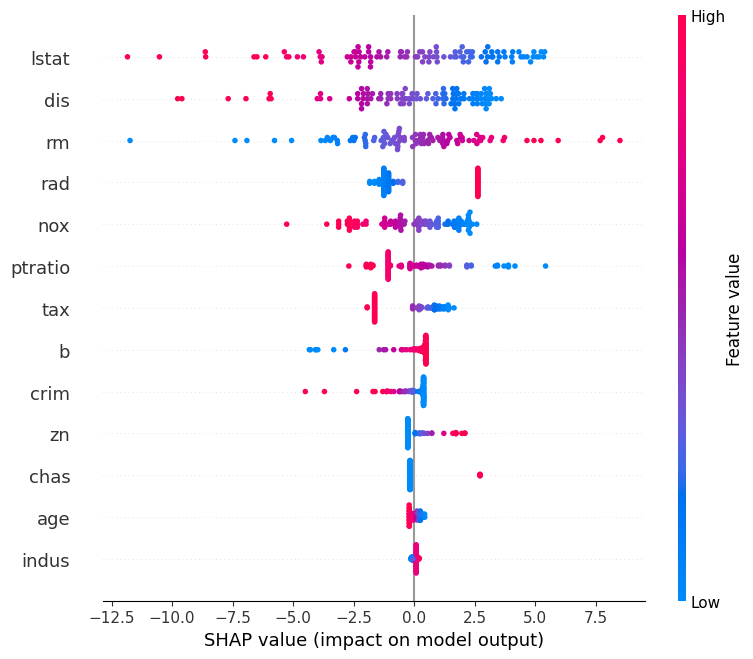

In [37]:
import shap

explainer = shap.Explainer(model_predict, masker=X_test.numpy())

shap_values = explainer.shap_values(X_test.numpy())

# Plot summary
shap.summary_plot(shap_values, X_test, feature_names=features)